In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


In [3]:
# Build path to dataset
from pathlib import Path

project_root = Path().resolve().parent
dataset_path = project_root / "dataset" / "data.csv"

# Load the dataset
df = pd.read_csv(dataset_path)
df


,ID,IMAGE,How scary is this image?,How likely are you to see something like this in a dream?,What is the dominant emotion of the image?,How realistic does this image look?,How likely is this image AI-generated?,How much would you pay for this as a painting (in euros)?,"If you were asked to improve this image to make it “perfect”, how many edits would you make?",Write a short story inspired by this image without naming any objects in it.,Does anything feel visually wrong/inconsistent in this image?
0,1,1,6,Neutral,Calm,1,8,2,4,Sometimes the body does not follow the mind.,"Yes: proportions/anatomy, Yes: perspective/geo..."
1,2,1,3,Very unlikely,Fear,3,10,0,5,NaN,"Yes: proportions/anatomy, Yes: lighting/shadow..."
2,3,1,8,Unlikely,"Sadness, Fear",2,10,8,12,The person trips and flies while shaking his a...,"Yes: proportions/anatomy, Yes: texture/details..."
3,4,1,1,Very unlikely,Confusion,1,2,0,7,Athleticism as a way of fighting your inner de...,"Yes: proportions/anatomy, Yes: lighting/shadow..."
4,5,1,1,Unlikely,Joy,1,7,0,7,Falling from grace through a sunlit sky. Sadne...,"Yes: proportions/anatomy, Yes: lighting/shadow..."
...,...,...,...,...,...,...,...,...,...,...,...
91,28,3,1,Neutral,Calm,3,5,0,33,NaN,Yes: texture/details
92,29,3,1,Very unlikely,Calm,2,9,0,2,Looking into the distance a young someone sits...,"Yes: proportions/anatomy, Yes: lighting/shadow..."
93,30,3,2,Very unlikely,Calm,5,4,0,0,Once upon a time a watchmen was enjoying the view,"No, nothing stands out"
94,31,3,3,Likely,Calm,3,10,0,"More texture, better composition, more interes...",Fidel wanted to revolutionise his country with...,"Yes: lighting/shadows, Yes: texture/details, Y..."


In [4]:
# Initial checks

print(f'shape = {df.shape}')
print()
print(df.info())
print()
print(df.describe(include="all"))

shape = (96, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   ID                                                                                            96 non-null     int64 
 1   IMAGE                                                                                         96 non-null     int64 
 2   How scary is this image?                                                                      96 non-null     int64 
 3   How likely are you to see something like this in  a dream?                                    96 non-null     object
 4   What is the dominant emotion of the image?                                                    93 non-null     object
 5   How realistic does t

In [5]:
# Missing data Analysis

# Count missing values per column
missing_count = df.isna().sum()

# Percentage
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage (%)": missing_percent
}).sort_values(by="Missing Percentage (%)", ascending=False)

missing_summary



,Missing Count,Missing Percentage (%)
Write a short story inspired by this image without naming any objects in it.,25,26.041667
"If you were asked to improve this image to make it “perfect”, how many edits would you make?",5,5.208333
What is the dominant emotion of the image?,3,3.125000
How scary is this image?,0,0.000000
IMAGE,0,0.000000
ID,0,0.000000
How likely are you to see something like this in a dream?,0,0.000000
How likely is this image AI-generated?,0,0.000000
How realistic does this image look?,0,0.000000
How much would you pay for this as a painting (in euros)?,0,0.000000


In [6]:
# Create a shorter version of column names for visualization
short_cols = {
    "How scary is this image?": "Scary",
    "How likely are you to see something like this in  a dream?": "Dream Likely",
    "What is the dominant emotion of the image?": "Dominant Emotion",
    "How realistic does this image look?": "Realistic",
    "How likely is this image AI-generated?": "AI Likely",
    "How much would you pay for this as a painting (in euros)?": "Price (€)",
    "If you were asked to improve this image to make it “perfect”, how many edits would you make?": "Edits",
    "Write a short story inspired by this image without naming any objects in it.": "Short Story",
    "Does anything feel visually wrong/inconsistent in this image?": "Visual Issues"
}

# Rename for plotting
df_plot = df.rename(columns=short_cols)

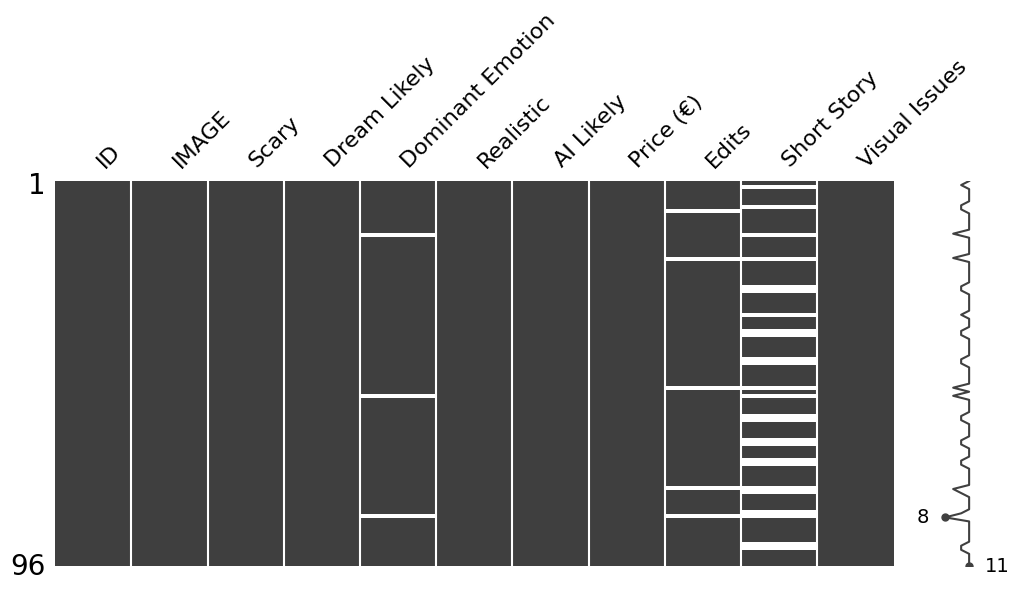

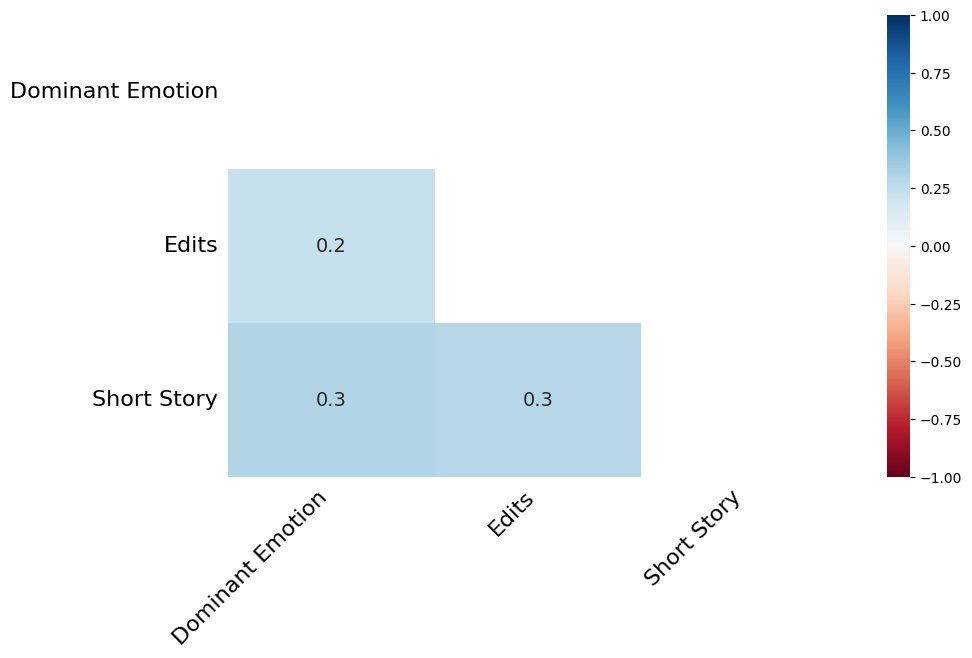

In [7]:
import missingno as msno

# Matrix
msno.matrix(df_plot, figsize=(12,5))
plt.show()

# Heatmap (correlation of missingness)
msno.heatmap(df_plot, figsize=(10,6))
plt.show()

In [8]:
# Summary statistics Quantitative variables


survey_numeric = ['How scary is this image?', 
                  'How realistic does this image look?', 
                  'How likely is this image AI-generated?']

df[survey_numeric].describe()




,How scary is this image?,How realistic does this image look?,How likely is this image AI-generated?
count,96.000000,96.000000,96.000000
mean,2.114583,2.968750,6.604167
std,1.685041,2.363998,2.412595
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,5.000000
50%,1.000000,2.000000,6.000000
75%,3.000000,5.000000,9.000000
max,8.000000,9.000000,10.000000


In [9]:
# Summary statistics Qualitative variables

categorical_cols = df.select_dtypes(include='object').columns

# Function to summarize categorical variables
def summarize_categorical(df, cols):
    for col in cols:
        print(f"\nColumn: {col}")
        counts = df[col].value_counts(dropna=False)
        percents = df[col].value_counts(normalize=True, dropna=False) * 100
        summary = pd.DataFrame({"Count": counts, "Percentage (%)": percents})
        display(summary)

summarize_categorical(df, categorical_cols)





Column: How likely are you to see something like this in  a dream?


,Count,Percentage (%)
How likely are you to see something like this in a dream?,,
Very unlikely,45,46.875000
Unlikely,26,27.083333
Neutral,16,16.666667
Likely,9,9.375000



Column: What is the dominant emotion of the image?


,Count,Percentage (%)
What is the dominant emotion of the image?,,
Calm,33,34.375000
Fear,8,8.333333
Confusion,5,5.208333
Joy,5,5.208333
Sadness,4,4.166667
"Joy, Calm",3,3.125000
NaN,3,3.125000
Anger,3,3.125000
Wonder,2,2.083333



Column: How much would you pay for this as a painting (in euros)?


,Count,Percentage (%)
How much would you pay for this as a painting (in euros)?,,
0,54,56.250000
10,9,9.375000
5,7,7.291667
1,4,4.166667
2,2,2.083333
3,2,2.083333
50,2,2.083333
15,2,2.083333
100,2,2.083333



Column: If you were asked to improve this image to make it “perfect”, how many edits would you make?


,Count,Percentage (%)
"If you were asked to improve this image to make it “perfect”, how many edits would you make?",,
0,15,15.625000
3,12,12.500000
5,10,10.416667
1,9,9.375000
4,5,5.208333
2,5,5.208333
NaN,5,5.208333
10,4,4.166667
20,3,3.125000



Column: Write a short story inspired by this image without naming any objects in it.


,Count,Percentage (%)
Write a short story inspired by this image without naming any objects in it.,,
NaN,25,26.041667
Sometimes the body does not follow the mind.,1,1.041667
The person trips and flies while shaking his arms. This is sad.,1,1.041667
Athleticism as a way of fighting your inner demons. The eternal struggle between you and you.,1,1.041667
"Falling from grace through a sunlit sky. Sadness and confusion. No more playing, time to get serious. Disform!",1,1.041667
...,...,...
"And there it was, while the background landscape was beautiful, the thing was ugly and old",1,1.041667
Looking into the distance a young someone sits atop items contemplating life,1,1.041667
Once upon a time a watchmen was enjoying the view,1,1.041667



Column: Does anything feel visually wrong/inconsistent in this image?


,Count,Percentage (%)
Does anything feel visually wrong/inconsistent in this image?,,
"No, nothing stands out",17,17.708333
Yes: proportions/anatomy,12,12.500000
"Yes: proportions/anatomy, Yes: lighting/shadows, Yes: texture/details, Yes: perspective/geometry",9,9.375000
Yes: texture/details,9,9.375000
"Yes: proportions/anatomy, Yes: perspective/geometry",7,7.291667
Yes: perspective/geometry,7,7.291667
"Yes: texture/details, Yes: perspective/geometry",6,6.250000
"Yes: proportions/anatomy, Yes: texture/details, Yes: perspective/geometry",4,4.166667
"Yes: lighting/shadows, Yes: texture/details, Yes: perspective/geometry",4,4.166667


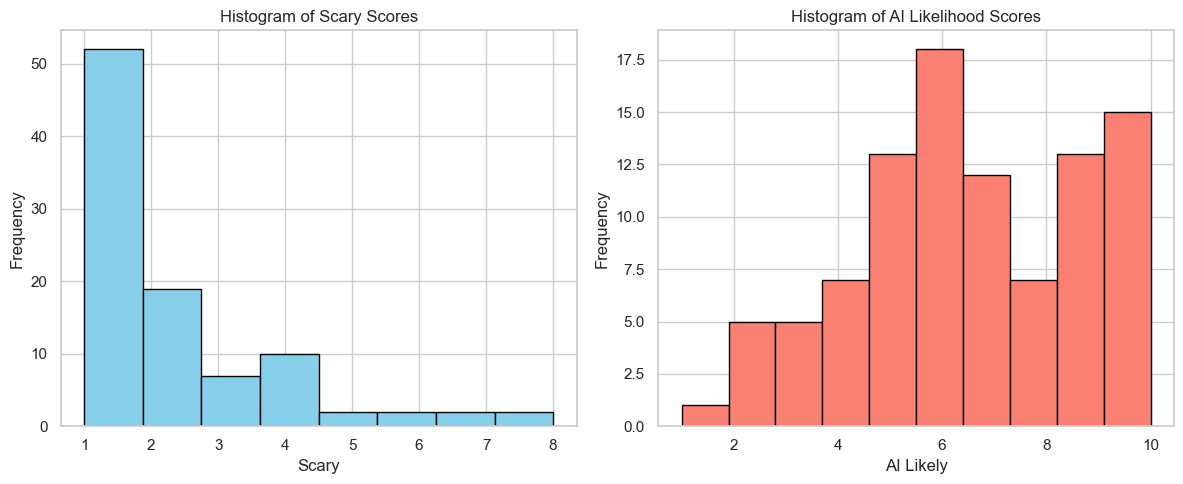

In [10]:
# Visualization

# Set style
sns.set(style="whitegrid")

# 1️⃣ Two Histograms

plt.figure(figsize=(12,5))

# Histogram 1: Scary
plt.subplot(1,2,1)
plt.hist(df_plot['Scary'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Scary Scores')
plt.xlabel('Scary')
plt.ylabel('Frequency')

# Histogram 2: AI Likelihood
plt.subplot(1,2,2)
plt.hist(df_plot['AI Likely'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of AI Likelihood Scores')
plt.xlabel('AI Likely')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



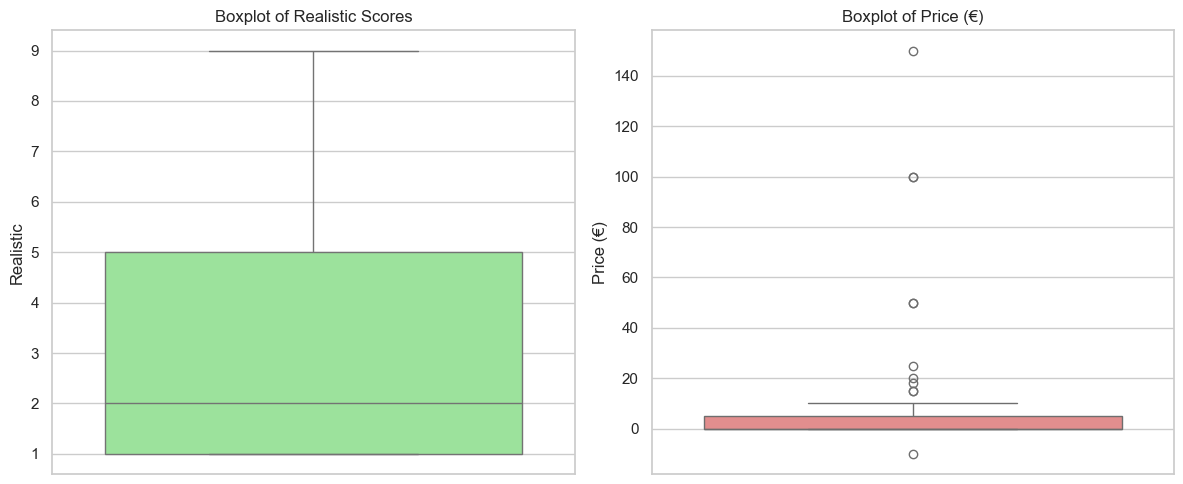

In [11]:
# 2️⃣ Two Boxplots
plt.figure(figsize=(12,5))

# Boxplot 1: Realistic scores
plt.subplot(1,2,1)
sns.boxplot(y=df_plot['Realistic'], color='lightgreen')
plt.title('Boxplot of Realistic Scores')
plt.ylabel('Realistic')

# Boxplot 2: Price (€)
plt.subplot(1,2,2)
sns.boxplot(y=pd.to_numeric(df_plot['Price (€)'], errors='coerce'), color='lightcoral')
plt.title('Boxplot of Price (€)')
plt.ylabel('Price (€)')

plt.tight_layout()
plt.show()


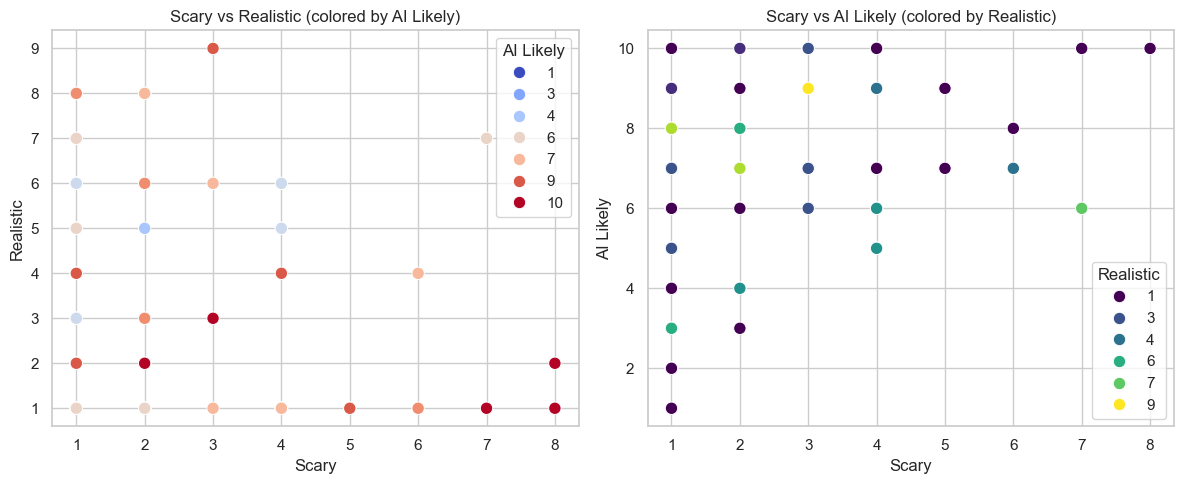

In [12]:
# 3️⃣ Two Scatterplots
plt.figure(figsize=(12,5))

# Scatterplot 1: Scary vs Realistic
plt.subplot(1,2,1)
sns.scatterplot(data=df_plot, x='Scary', y='Realistic', hue='AI Likely', palette='coolwarm', s=80)
plt.title('Scary vs Realistic (colored by AI Likely)')

# Scatterplot 2: Scary vs AI Likely
plt.subplot(1,2,2)
sns.scatterplot(data=df_plot, x='Scary', y='AI Likely', hue='Realistic', palette='viridis', s=80)
plt.title('Scary vs AI Likely (colored by Realistic)')

plt.tight_layout()
plt.show()


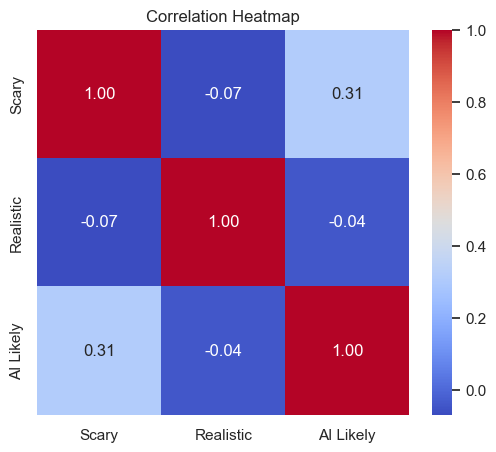

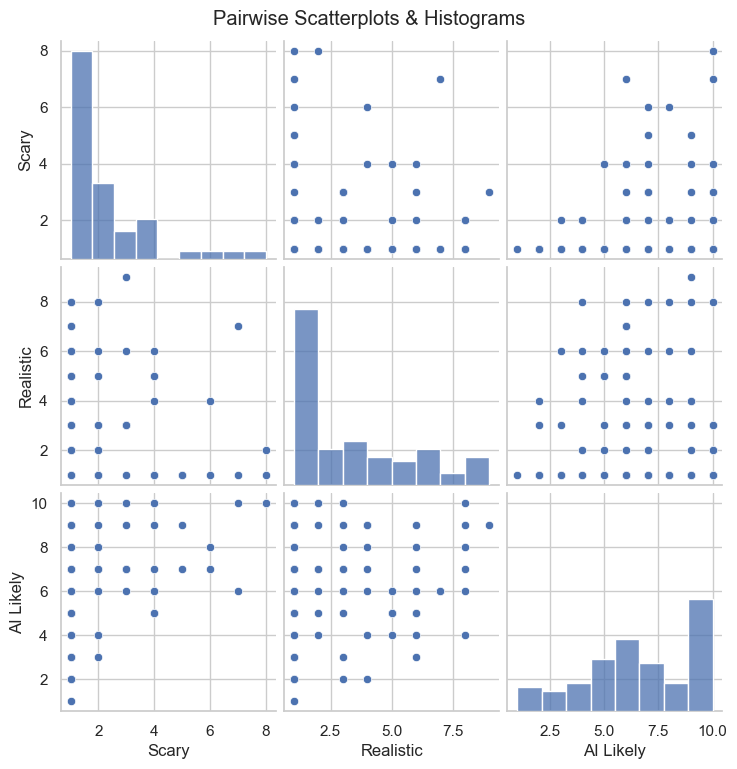

In [13]:
# 4️⃣ Two Correlation Visualizations
# Convert numeric columns to float for correlation
numeric_cols = ['Scary', 'Realistic', 'AI Likely']
corr_matrix = df_plot[numeric_cols].corr()

# Heatmap 1
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (scatter + histogram)
sns.pairplot(df_plot[numeric_cols])
plt.suptitle('Pairwise Scatterplots & Histograms', y=1.02)
plt.show()